# Importing basic necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading and Checking the dataset

In [2]:
data = pd.read_csv("/kaggle/input/mxmh-survey-results/mxmh_survey_results.csv")

In [3]:
df = data.copy()
df.head(10)

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.
5,8/27/2022 21:56:50,18.0,Spotify,5.0,Yes,Yes,Yes,Jazz,Yes,Yes,...,Very frequently,Very frequently,Very frequently,Never,8.0,8.0,7.0,7.0,Improve,I understand.
6,8/27/2022 22:00:29,18.0,YouTube Music,3.0,Yes,Yes,No,Video game music,Yes,Yes,...,Rarely,Never,Never,Sometimes,4.0,8.0,6.0,0.0,Improve,I understand.
7,8/27/2022 22:18:59,21.0,Spotify,1.0,Yes,No,No,K pop,Yes,Yes,...,Sometimes,Rarely,Never,Rarely,5.0,3.0,5.0,3.0,Improve,I understand.
8,8/27/2022 22:33:05,19.0,Spotify,6.0,Yes,No,No,Rock,No,No,...,Never,Never,Very frequently,Never,2.0,0.0,0.0,0.0,Improve,I understand.
9,8/27/2022 22:44:03,18.0,I do not use a streaming service.,1.0,Yes,No,No,R&B,Yes,Yes,...,Sometimes,Rarely,Sometimes,Sometimes,2.0,2.0,5.0,1.0,Improve,I understand.


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Timestamp                     736 non-null    object 
 1   Age                           735 non-null    float64
 2   Primary streaming service     735 non-null    object 
 3   Hours per day                 736 non-null    float64
 4   While working                 733 non-null    object 
 5   Instrumentalist               732 non-null    object 
 6   Composer                      735 non-null    object 
 7   Fav genre                     736 non-null    object 
 8   Exploratory                   736 non-null    object 
 9   Foreign languages             732 non-null    object 
 10  BPM                           629 non-null    float64
 11  Frequency [Classical]         736 non-null    object 
 12  Frequency [Country]           736 non-null    object 
 13  Frequ

In [5]:
# statistical report
df.describe()

,Age,Hours per day,BPM,Anxiety,Depression,Insomnia,OCD
count,735.000000,736.000000,6.290000e+02,736.000000,736.000000,736.000000,736.000000
mean,25.206803,3.572758,1.589948e+06,5.837636,4.796196,3.738451,2.637228
std,12.054970,3.028199,3.987261e+07,2.793054,3.028870,3.088689,2.842017
min,10.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,18.000000,2.000000,1.000000e+02,4.000000,2.000000,1.000000,0.000000
50%,21.000000,3.000000,1.200000e+02,6.000000,5.000000,3.000000,2.000000
75%,28.000000,5.000000,1.440000e+02,8.000000,7.000000,6.000000,5.000000
max,89.000000,24.000000,1.000000e+09,10.000000,10.000000,10.000000,10.000000


In [6]:
# Checking how many columns have NaN values

nan_cols = df.isna().sum()
nan_cols = nan_cols[nan_cols > 0]
print("Columns with NaN values and their counts:")
print(nan_cols)

Columns with NaN values and their counts:
Age                            1
Primary streaming service      1
While working                  3
Instrumentalist                4
Composer                       1
Foreign languages              4
BPM                          107
Music effects                  8
dtype: int64


In [7]:
# BPM has the most NaN values so we can replace them with median

df['BPM'] = df['BPM'].fillna(df['BPM'].median())

In [8]:
# Timestamps and permissions columns are useless features in the context of this analysis so we drop them

df = df.drop(columns=['Permissions', 'Timestamp'])
display(df.head(10))

,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,BPM,...,Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects
0,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,156.0,...,Very frequently,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN
1,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,119.0,...,Sometimes,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN
2,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,132.0,...,Rarely,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect
3,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,84.0,...,Sometimes,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve
4,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,107.0,...,Sometimes,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve
5,18.0,Spotify,5.0,Yes,Yes,Yes,Jazz,Yes,Yes,86.0,...,Very frequently,Very frequently,Very frequently,Very frequently,Never,8.0,8.0,7.0,7.0,Improve
6,18.0,YouTube Music,3.0,Yes,Yes,No,Video game music,Yes,Yes,66.0,...,Rarely,Rarely,Never,Never,Sometimes,4.0,8.0,6.0,0.0,Improve
7,21.0,Spotify,1.0,Yes,No,No,K pop,Yes,Yes,95.0,...,Sometimes,Sometimes,Rarely,Never,Rarely,5.0,3.0,5.0,3.0,Improve
8,19.0,Spotify,6.0,Yes,No,No,Rock,No,No,94.0,...,Never,Never,Never,Very frequently,Never,2.0,0.0,0.0,0.0,Improve
9,18.0,I do not use a streaming service.,1.0,Yes,No,No,R&B,Yes,Yes,155.0,...,Sometimes,Sometimes,Rarely,Sometimes,Sometimes,2.0,2.0,5.0,1.0,Improve


# Analysis of the Age Column

In [9]:
display(df[df['Age'].isna()])

,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,BPM,...,Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects
12,NaN,Spotify,3.0,Yes,No,No,Hip hop,Yes,Yes,120.0,...,Sometimes,Sometimes,Rarely,Rarely,Never,9.0,3.0,2.0,7.0,Improve


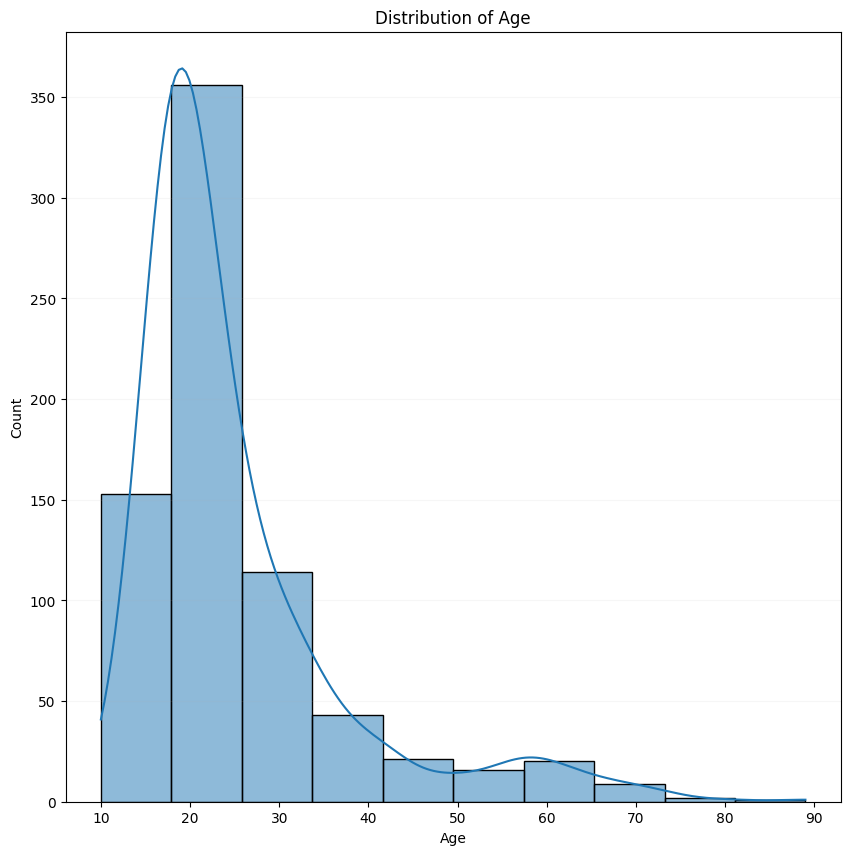

In [10]:
# Generating Histogram with kernel denstity estimate

plt.figure(figsize=(10,10))
sns.histplot(df['Age'].dropna(), bins=10, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid(axis='y', alpha=0.1)
plt.show()

violin plots are often very useful in visualizing the distribution of numerical data and comparing distributions across different categories.

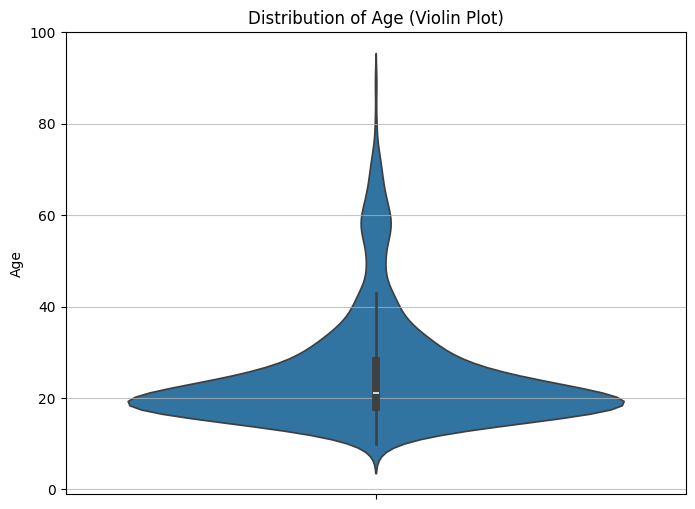

In [11]:
# creating violin plot 

plt.figure(figsize=(8, 6))
sns.violinplot(y=df['Age'].dropna())
plt.title('Distribution of Age (Violin Plot)')
plt.ylabel('Age')
plt.grid(axis='y', alpha=0.75)
plt.show()

# Number of listeners per genre

/tmp/ipykernel_17/255957141.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y = df['Fav genre'],palette="bright")


<Axes: xlabel='count', ylabel='Fav genre'>

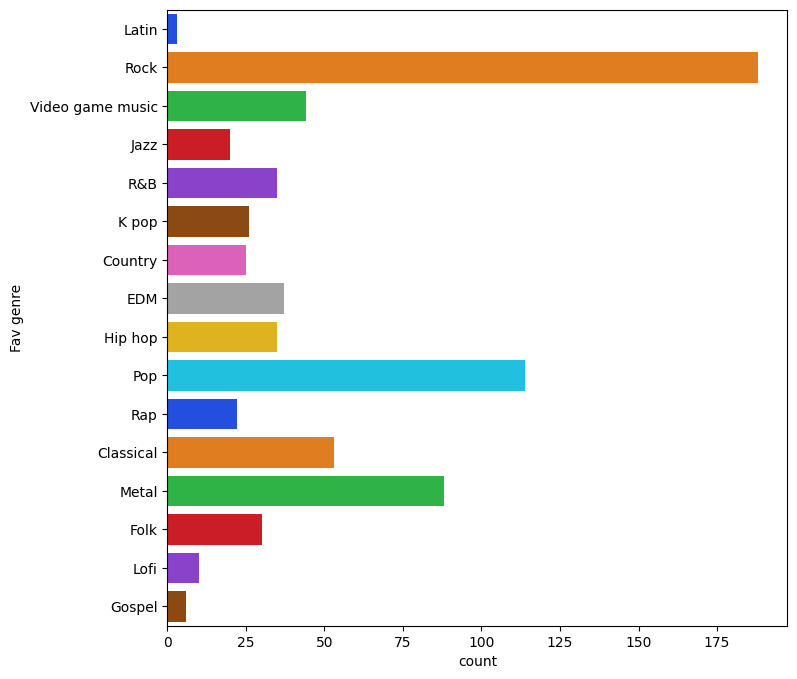

In [12]:
#histogram of genres vs number of listeners

plt.figure(figsize=(8,8))
sns.countplot(y = df['Fav genre'],palette="bright")

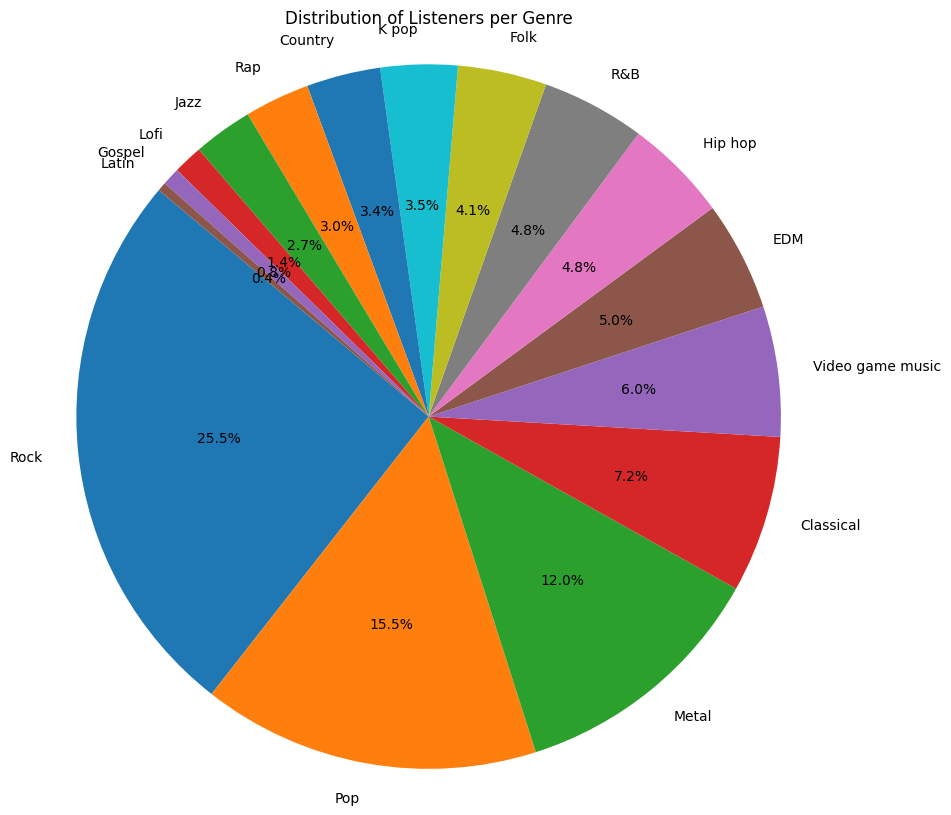

In [13]:
genre_counts = df['Fav genre'].value_counts()

plt.figure(figsize=(10, 10))
plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Listeners per Genre')
plt.axis('equal') 
plt.show()

# Effects of music on imporvement of mental health as reported in the survey

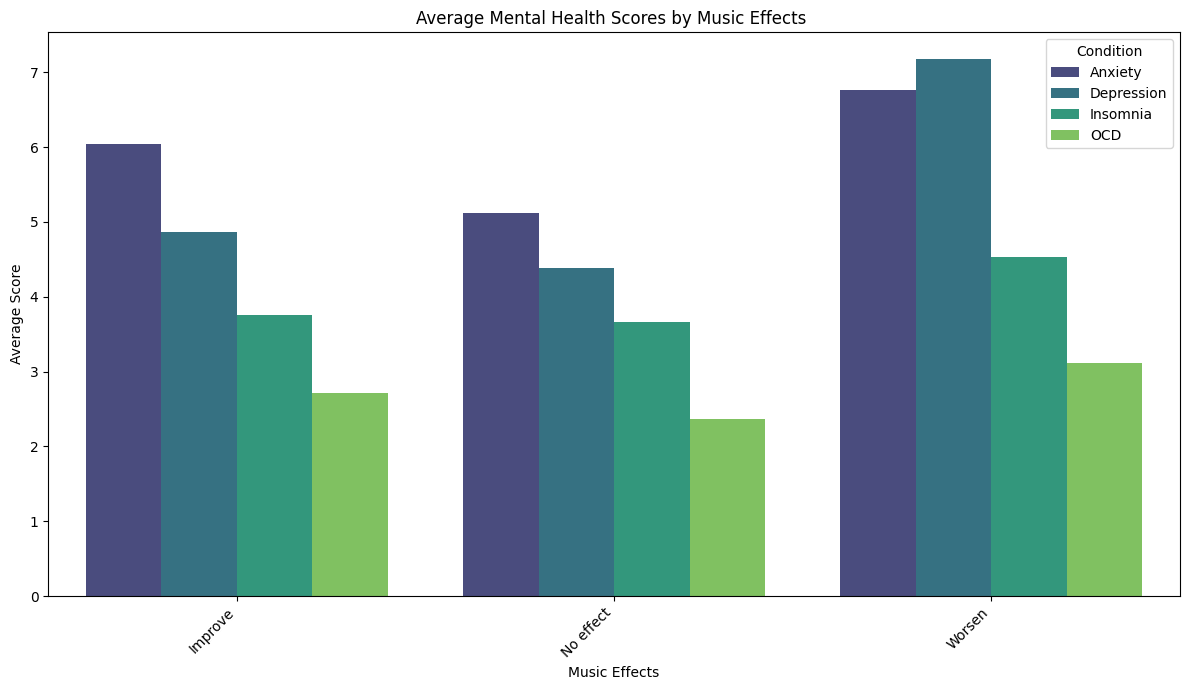

In [14]:
# dropping instances where user hasn't specified anything about how music affects on their health
df = df.dropna(subset=['Music effects']).copy()

# Grouping by 'Music effects' and calculating the mean of the original mental health scores
mental_health_effects = df.groupby('Music effects')[['Anxiety', 'Depression', 'Insomnia', 'OCD']].mean().reset_index()

mental_health_effects_melted = mental_health_effects.melt(id_vars='Music effects', 
                                                            var_name='Mental Health Condition', 
                                                            value_name='Average Score')

plt.figure(figsize=(12, 7))
sns.barplot(data=mental_health_effects_melted, 
            x='Music effects', 
            y='Average Score', 
            hue='Mental Health Condition', 
            palette='viridis')

plt.title('Average Mental Health Scores by Music Effects ')
plt.xlabel('Music Effects')
plt.ylabel('Average Score')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Condition')
plt.tight_layout()
plt.show()

Interesting to note that on average :

1. Users suffering from high anxiety have reported that their conditions have worsened after listening to music
2. Users suffering from high levels of depression report their conditions have worsened as well
4. Those with high levels of OCD report that music also worsened their condns


   This suggests a correlation where individuals with higher scores in these mental health conditions might experience music negatively

<Axes: xlabel='Music effects', ylabel='count'>

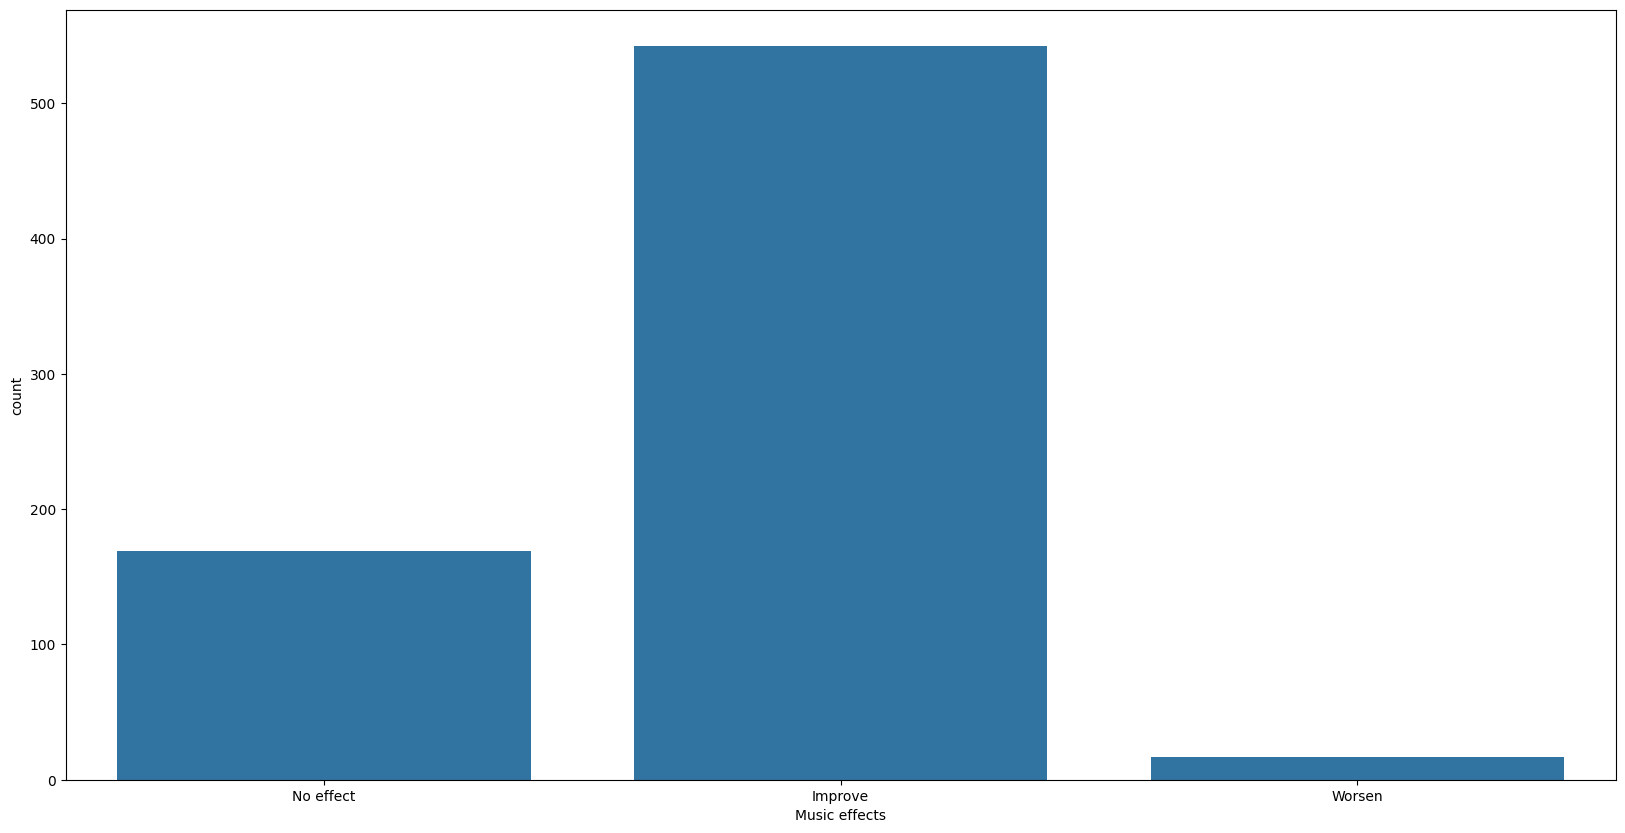

In [15]:
plt.figure(figsize=(20,10))
sns.countplot(data=df, x="Music effects")

Study also shows that most users from the survey report that music has improved their condition in general

# Relationship between number of hours listened and mental health condition

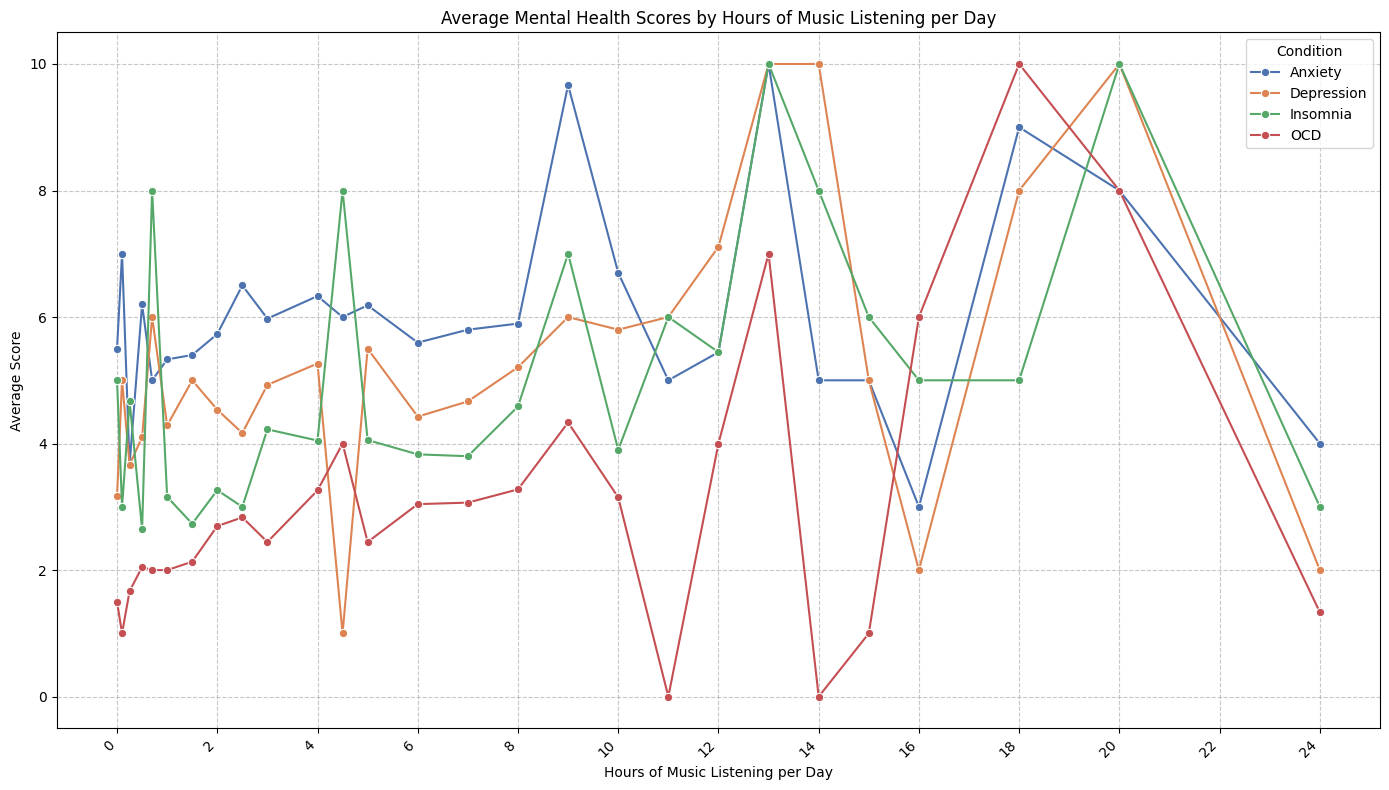

In [16]:
# Grouping by 'Hours per day' and calculating the mean of mental health scores
mental_health_by_hours = df.groupby('Hours per day')[['Anxiety', 'Depression', 'Insomnia', 'OCD']].mean().reset_index()


mental_health_by_hours_melted = mental_health_by_hours.melt(id_vars='Hours per day',
                                                             var_name='Mental Health Condition',
                                                             value_name='Average Score')

plt.figure(figsize=(14, 8))
sns.lineplot(data=mental_health_by_hours_melted,
             x='Hours per day',
             y='Average Score',
             hue='Mental Health Condition',
             marker='o', 
             palette='deep')

plt.title('Average Mental Health Scores by Hours of Music Listening per Day')
plt.xlabel('Hours of Music Listening per Day')
plt.ylabel('Average Score')


max_hours = mental_health_by_hours['Hours per day'].max()
plt.xticks(np.arange(0, max_hours + 1, 2), rotation=45, ha='right') 
plt.legend(title='Condition')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

It can be observed that 
1. Low to Moderate Listening hours - > lower average scores scross mental health conditions
2. Moderate to High listening hours - > higher average scores across mental health conditions

Insomnia shows a more positive correlation between higher listening hours and higher average scores which is possible because listening to music for longer hours would disrupt sleep cycles

# Let's check how baseline models are useful for predicting the presence of mental health conditions

In [17]:
from sklearn.model_selection import train_test_split

#X = df.drop(['Depression', 'Anxiety', 'Insomnia', 'OCD'], axis=1)
y1 = df['Anxiety']
y2 = df['Depression']
y3 = df['Insomnia']
y4 = df['OCD']
y = np.column_stack((y1, y2, y3, y4))

X = df.drop(['Anxiety', 'Depression', 'Insomnia', 'OCD'], axis=1)

# We are going to assign the value of 0 if the user has rated the particular
# condition less than 5 and assign 1 for vice versa for binary classification

def binarize(y, threshold=5):
    return (y >= threshold).astype(int)

y = binarize(y)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2,
    stratify=df['Fav genre'], 
    random_state=42
)

Creating Validation set

In [18]:
X_train_val, X_val, y_train_val, y_val = train_test_split(
    X_train, y_train, test_size=0.2,
    stratify = X_train['Fav genre'],
    random_state=42
)


In [19]:
X_train_val.shape, X_val.shape, X_test.shape


((465, 27), (117, 27), (146, 27))

In [20]:
X_train.shape, X_val.shape, X_test.shape

((582, 27), (117, 27), (146, 27))

In [21]:
numerical_features = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X_train.select_dtypes(include=['object']).columns.tolist()

print(f"Numerical features: {numerical_features}\n")
print(f"Categorical features: {categorical_features}")

Numerical features: ['Age', 'Hours per day', 'BPM']

Categorical features: ['Primary streaming service', 'While working', 'Instrumentalist', 'Composer', 'Fav genre', 'Exploratory', 'Foreign languages', 'Frequency [Classical]', 'Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]', 'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [Jazz]', 'Frequency [K pop]', 'Frequency [Latin]', 'Frequency [Lofi]', 'Frequency [Metal]', 'Frequency [Pop]', 'Frequency [R&B]', 'Frequency [Rap]', 'Frequency [Rock]', 'Frequency [Video game music]', 'Music effects']


# Pipeline

In [22]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OrdinalEncoder 
from sklearn.compose import ColumnTransformer

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ordinal', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)) 
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough'
)


In [23]:
X_train_processed = preprocessor.fit_transform(X_train_val)
X_val_processed = preprocessor.transform(X_val)
X_test_processed = preprocessor.transform(X_test)

cat_idxs = [i for i, col in enumerate(numerical_features + categorical_features) if col in categorical_features]

ordinal_encoder = preprocessor.named_transformers_['cat'].named_steps['ordinal']

cat_dims = [len(categories) + 1 for categories in ordinal_encoder.categories_] # +1 for unknown_value=-1


In [24]:
!pip install pytorch-tabnet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 1.4 MB/s eta 0:00:00


# Defining the model architecture

In [25]:
from pytorch_tabnet.tab_model import TabNetClassifier
import torch

clf = TabNetClassifier(
    n_d=64, n_a=64, n_steps=5,
    gamma=1.5, n_independent=2, n_shared=2,
    cat_idxs=cat_idxs,
    cat_dims=cat_dims,
    cat_emb_dim=1,
    lambda_sparse=1e-4, momentum=0.3, clip_value=2.,
    optimizer_fn=torch.optim.Adam,
    optimizer_params=dict(lr=2e-2),
    scheduler_params = {"gamma": 0.95,
                     "step_size": 20},
    scheduler_fn=torch.optim.lr_scheduler.StepLR, epsilon=1e-15
)

clf


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


TabNetClassifier(n_d=64, n_a=64, n_steps=5, gamma=1.5, cat_idxs=[3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26], cat_dims=[7, 3, 3, 3, 17, 3, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4], cat_emb_dim=[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], n_independent=2, n_shared=2, epsilon=1e-15, momentum=0.3, lambda_sparse=0.0001, seed=0, clip_value=2.0, verbose=1, optimizer_fn=<class 'torch.optim.adam.Adam'>, optimizer_params={'lr': 0.02}, scheduler_fn=<class 'torch.optim.lr_scheduler.StepLR'>, scheduler_params={'gamma': 0.95, 'step_size': 20}, mask_type='sparsemax', input_dim=None, output_dim=None, device_name='auto', n_shared_decoder=1, n_indep_decoder=1, grouped_features=[])

In [26]:
max_epochs = 100

# Training our classifier on each mental health condition ( NO hyperparameter Tuning )

In [27]:
from pytorch_tabnet.augmentations import ClassificationSMOTE
aug = ClassificationSMOTE(p=0.2)


mental_health_conditions = ['Anxiety', 'Depression', 'Insomnia', 'OCD']
for i, condition in enumerate(mental_health_conditions):
    
    print(f"\n----Training the classifier on {condition}-----")
    
    clf.fit(
        
        X_train=X_train_processed, y_train=y_train_val[:, i], # Select the first target column for training
        eval_set=[(X_train_processed, y_train_val[:, i]), (X_val_processed, y_val[:, i])], # Select the first target column for evaluation
        eval_name=['train', 'valid'],
        eval_metric =['accuracy'],
        max_epochs=max_epochs, patience=20,
        batch_size=64, virtual_batch_size=32,
        #augmentations=aug 
)


----Training the classifier on Anxiety-----
epoch 0  | loss: 1.9556  | train_accuracy: 0.62581 | valid_accuracy: 0.65812 |  0:00:00s
epoch 1  | loss: 1.23995 | train_accuracy: 0.68602 | valid_accuracy: 0.71795 |  0:00:01s
epoch 2  | loss: 1.17312 | train_accuracy: 0.69892 | valid_accuracy: 0.7094  |  0:00:01s
epoch 3  | loss: 1.08073 | train_accuracy: 0.5828  | valid_accuracy: 0.49573 |  0:00:02s
epoch 4  | loss: 0.95387 | train_accuracy: 0.66667 | valid_accuracy: 0.7094  |  0:00:02s
epoch 5  | loss: 0.92005 | train_accuracy: 0.65161 | valid_accuracy: 0.73504 |  0:00:03s
epoch 6  | loss: 0.79115 | train_accuracy: 0.68172 | valid_accuracy: 0.77778 |  0:00:03s
epoch 7  | loss: 0.71037 | train_accuracy: 0.60645 | valid_accuracy: 0.58974 |  0:00:04s
epoch 8  | loss: 0.67563 | train_accuracy: 0.6172  | valid_accuracy: 0.60684 |  0:00:04s
epoch 9  | loss: 0.63587 | train_accuracy: 0.70323 | valid_accuracy: 0.7265  |  0:00:05s
epoch 10 | loss: 0.61263 | train_accuracy: 0.68172 | valid_accura

/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


epoch 0  | loss: 2.00444 | train_accuracy: 0.51398 | valid_accuracy: 0.54701 |  0:00:00s
epoch 1  | loss: 1.50229 | train_accuracy: 0.56129 | valid_accuracy: 0.47863 |  0:00:01s
epoch 2  | loss: 1.13468 | train_accuracy: 0.55484 | valid_accuracy: 0.54701 |  0:00:01s
epoch 3  | loss: 1.0238  | train_accuracy: 0.53118 | valid_accuracy: 0.5641  |  0:00:02s
epoch 4  | loss: 1.02997 | train_accuracy: 0.49247 | valid_accuracy: 0.4359  |  0:00:02s
epoch 5  | loss: 0.92239 | train_accuracy: 0.57419 | valid_accuracy: 0.53846 |  0:00:03s
epoch 6  | loss: 0.96674 | train_accuracy: 0.57204 | valid_accuracy: 0.57265 |  0:00:03s
epoch 7  | loss: 0.7695  | train_accuracy: 0.57634 | valid_accuracy: 0.51282 |  0:00:04s
epoch 8  | loss: 0.73374 | train_accuracy: 0.61505 | valid_accuracy: 0.52137 |  0:00:04s
epoch 9  | loss: 0.68061 | train_accuracy: 0.60645 | valid_accuracy: 0.5641  |  0:00:04s
epoch 10 | loss: 0.70558 | train_accuracy: 0.49462 | valid_accuracy: 0.42735 |  0:00:05s
epoch 11 | loss: 0.71

/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


epoch 0  | loss: 1.91798 | train_accuracy: 0.57419 | valid_accuracy: 0.59829 |  0:00:00s
epoch 1  | loss: 1.28431 | train_accuracy: 0.56774 | valid_accuracy: 0.59829 |  0:00:01s
epoch 2  | loss: 1.13991 | train_accuracy: 0.52258 | valid_accuracy: 0.52991 |  0:00:01s
epoch 3  | loss: 0.93998 | train_accuracy: 0.51828 | valid_accuracy: 0.47863 |  0:00:02s
epoch 4  | loss: 0.91698 | train_accuracy: 0.55269 | valid_accuracy: 0.61538 |  0:00:02s
epoch 5  | loss: 0.7903  | train_accuracy: 0.58065 | valid_accuracy: 0.60684 |  0:00:03s
epoch 6  | loss: 0.80058 | train_accuracy: 0.5871  | valid_accuracy: 0.61538 |  0:00:03s
epoch 7  | loss: 0.80817 | train_accuracy: 0.5914  | valid_accuracy: 0.5812  |  0:00:04s
epoch 8  | loss: 0.68119 | train_accuracy: 0.56559 | valid_accuracy: 0.47863 |  0:00:04s
epoch 9  | loss: 0.67721 | train_accuracy: 0.6043  | valid_accuracy: 0.49573 |  0:00:05s
epoch 10 | loss: 0.68235 | train_accuracy: 0.58925 | valid_accuracy: 0.66667 |  0:00:05s
epoch 11 | loss: 0.67

/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


epoch 0  | loss: 1.28811 | train_accuracy: 0.74409 | valid_accuracy: 0.64957 |  0:00:00s
epoch 1  | loss: 1.15067 | train_accuracy: 0.53763 | valid_accuracy: 0.50427 |  0:00:00s
epoch 2  | loss: 1.00438 | train_accuracy: 0.68387 | valid_accuracy: 0.58974 |  0:00:01s
epoch 3  | loss: 1.2468  | train_accuracy: 0.73763 | valid_accuracy: 0.61538 |  0:00:01s
epoch 4  | loss: 1.00983 | train_accuracy: 0.72688 | valid_accuracy: 0.5812  |  0:00:02s
epoch 5  | loss: 0.82001 | train_accuracy: 0.75699 | valid_accuracy: 0.58974 |  0:00:02s
epoch 6  | loss: 0.66966 | train_accuracy: 0.67742 | valid_accuracy: 0.49573 |  0:00:03s
epoch 7  | loss: 0.7     | train_accuracy: 0.76559 | valid_accuracy: 0.63248 |  0:00:04s
epoch 8  | loss: 0.60855 | train_accuracy: 0.76129 | valid_accuracy: 0.63248 |  0:00:04s
epoch 9  | loss: 0.53661 | train_accuracy: 0.75269 | valid_accuracy: 0.61538 |  0:00:05s
epoch 10 | loss: 0.54434 | train_accuracy: 0.75484 | valid_accuracy: 0.66667 |  0:00:05s
epoch 11 | loss: 0.55

/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


In [28]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

model_performance = {}
for i, condition in enumerate(mental_health_conditions):
    
    print(f"\n--- Evaluating model for {condition} ---")

    y_pred = clf.predict(X_test_processed)
    y_proba = clf.predict_proba(X_test_processed)[:, 1] # Probability of the positive class
    y_true = y_test[:, i]

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='binary', zero_division=0)
    recall = recall_score(y_true, y_pred, average='binary', zero_division=0)
    f1 = f1_score(y_true, y_pred, average='binary', zero_division=0)

    if len(np.unique(y_true)) > 1:
        roc_auc = roc_auc_score(y_true, y_proba)
    else:
        roc_auc = np.nan

    # Store the metrics
    
    model_performance[condition] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'roc_auc': roc_auc
    }

    # Print the metrics
    
    print(f"  Accuracy: {accuracy:.2f}")
    print(f"  Precision: {precision:.2f}")
    print(f"  Recall: {recall:.2f}")
    print(f"  F1-Score: {f1:.2f}")
    print(f"  ROC AUC: {roc_auc:.2f}")



--- Evaluating model for Anxiety ---
  Accuracy: 0.38
  Precision: 0.67
  Recall: 0.04
  F1-Score: 0.08
  ROC AUC: 0.57

--- Evaluating model for Depression ---
  Accuracy: 0.54
  Precision: 0.67
  Recall: 0.06
  F1-Score: 0.11
  ROC AUC: 0.50

--- Evaluating model for Insomnia ---
  Accuracy: 0.68
  Precision: 0.67
  Recall: 0.08
  F1-Score: 0.15
  ROC AUC: 0.54

--- Evaluating model for OCD ---
  Accuracy: 0.75
  Precision: 0.17
  Recall: 0.03
  F1-Score: 0.05
  ROC AUC: 0.51


# Hyperparameter tuning Using OPTUNA

let's create an optuna study to check if model performance improves after tuning the TabNetClassifier parameters

The following parameters have the most impact based on TabNet's architecture :


n_d (decision dimension): Size of the representation used to make prediction at each step

n_a (attention dimension) : Size of the feature-selection (masking) representation.

n_steps : Number of sequential decision steps. Each step selects features and contributes to the final prediction. More steps gives better modeling of complex interaction of features

gamma (Relaxation Factor): 1.0 to 2.5. Controls how much a feature can be reused across different decision steps

lambda_sparse (Sparsity Regularization): 0 to 0.00001. A higher value encourages more feature selection (sparse attention).

virtual_batch_size (Ghost Batch Normalization): Usually 128 to 2048. Helps generalize better.

batch_size: 256 to 32768. Larger batch sizes generally improve performance. 

In [29]:
import warnings
warnings.filterwarnings(
    "ignore",
    category=UserWarning,
    module="pytorch_tabnet"
)

import optuna
import torch
from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, precision_recall_curve, auc
import sys, os


final_models = {}
best_params = {}


for i, condition in enumerate(mental_health_conditions):
    print(f"\n=== Hyperparameter tuning for {condition} ===")

    def objective(trial):
        # Suggestions
        
        n_d = trial.suggest_int("n_d", 8, 32)
        n_a = trial.suggest_int("n_a", 8, 32)
        n_steps = trial.suggest_int("n_steps", 2, 5)
        lr = trial.suggest_float("lr", 1e-4, 5e-3, log=True)

        clf = TabNetClassifier(
            n_d=n_d,
            n_a=n_a,
            n_steps=n_steps,
            cat_idxs=cat_idxs,
            cat_dims=cat_dims,
            cat_emb_dim=1,
            optimizer_fn=torch.optim.Adam,
            optimizer_params=dict(lr=lr),
            verbose=0
        )
        

    
        #original_stdout = sys.stdout
        #sys.stdout = open(os.devnull, 'w')

        clf.fit(
            X_train=X_train_processed,
            y_train=y_train_val[:, i],
            eval_set=[(X_val_processed, y_val[:, i])],
            eval_metric=['auc'],
            max_epochs=100,
            patience=20,
            batch_size=64,
            virtual_batch_size=32
        )

        #sys.stdout.close()
        #sys.stdout = original_stdout

       
        y_pred_prob = clf.predict_proba(X_val_processed)[:, 1]
        auc_score = roc_auc_score(y_val[:, i], y_pred_prob)

        return auc_score

    # Create Optuna study
    study = optuna.create_study(direction="maximize")
    study.optimize(objective, n_trials=20, show_progress_bar=True)

    # Store best hyperparameters
    best_params[condition] = study.best_params
    print(f"Best params for {condition}: {study.best_params}")

    


/usr/local/lib/python3.12/dist-packages/sqlalchemy/orm/query.py:195: SyntaxWarning: "is not" with 'tuple' literal. Did you mean "!="?
  if entities is not ():
[I 2026-01-22 09:00:46,451] A new study created in memory with name: no-name-fb6dbac6-b57e-4b7e-8a82-11ef99f54297



=== Hyperparameter tuning for Anxiety ===


/usr/local/lib/python3.12/dist-packages/optuna/progress_bar.py:47: ExperimentalWarning: Progress bar is experimental (supported from v1.2.0). The interface can change in the future.
  self._init_valid()


  0%|          | 0/20 [00:00<?, ?it/s]


Early stopping occurred at epoch 52 with best_epoch = 32 and best_val_0_auc = 0.5934
[I 2026-01-22 09:01:00,543] Trial 0 finished with value: 0.5933983495873969 and parameters: {'n_d': 29, 'n_a': 9, 'n_steps': 4, 'lr': 0.00015370260230869044}. Best is trial 0 with value: 0.5933983495873969.

Early stopping occurred at epoch 21 with best_epoch = 1 and best_val_0_auc = 0.6114
[I 2026-01-22 09:01:05,600] Trial 1 finished with value: 0.6114028507126781 and parameters: {'n_d': 28, 'n_a': 20, 'n_steps': 3, 'lr': 0.00016092208543497252}. Best is trial 1 with value: 0.6114028507126781.

Early stopping occurred at epoch 31 with best_epoch = 11 and best_val_0_auc = 0.55776
[I 2026-01-22 09:01:14,013] Trial 2 finished with value: 0.5577644411102776 and parameters: {'n_d': 12, 'n_a': 23, 'n_steps': 4, 'lr': 0.00016110336149761822}. Best is trial 1 with value: 0.6114028507126781.

Early stopping occurred at epoch 20 with best_epoch = 0 and best_val_0_auc = 0.49512
[I 2026-01-22 09:01:19,470] Trial

[I 2026-01-22 09:03:48,080] A new study created in memory with name: no-name-f6533237-4855-4edf-88da-90da50718571



Early stopping occurred at epoch 29 with best_epoch = 9 and best_val_0_auc = 0.55551
[I 2026-01-22 09:03:48,077] Trial 19 finished with value: 0.5555138784696174 and parameters: {'n_d': 25, 'n_a': 26, 'n_steps': 4, 'lr': 0.00023186293470436816}. Best is trial 10 with value: 0.7291822955738935.
Best params for Anxiety: {'n_d': 24, 'n_a': 16, 'n_steps': 5, 'lr': 0.00033318717852476483}

=== Hyperparameter tuning for Depression ===


/usr/local/lib/python3.12/dist-packages/optuna/progress_bar.py:47: ExperimentalWarning: Progress bar is experimental (supported from v1.2.0). The interface can change in the future.
  self._init_valid()


  0%|          | 0/20 [00:00<?, ?it/s]


Early stopping occurred at epoch 37 with best_epoch = 17 and best_val_0_auc = 0.61763
[I 2026-01-22 09:03:58,349] Trial 0 finished with value: 0.6176297169811321 and parameters: {'n_d': 16, 'n_a': 19, 'n_steps': 4, 'lr': 0.001373921678393039}. Best is trial 0 with value: 0.6176297169811321.

Early stopping occurred at epoch 28 with best_epoch = 8 and best_val_0_auc = 0.51533
[I 2026-01-22 09:04:06,306] Trial 1 finished with value: 0.5153301886792453 and parameters: {'n_d': 27, 'n_a': 20, 'n_steps': 4, 'lr': 0.00111668081621974}. Best is trial 0 with value: 0.6176297169811321.

Early stopping occurred at epoch 72 with best_epoch = 52 and best_val_0_auc = 0.67659
[I 2026-01-22 09:04:22,665] Trial 2 finished with value: 0.6765919811320754 and parameters: {'n_d': 21, 'n_a': 22, 'n_steps': 3, 'lr': 0.0007196635773140973}. Best is trial 2 with value: 0.6765919811320754.

Early stopping occurred at epoch 27 with best_epoch = 7 and best_val_0_auc = 0.62146
[I 2026-01-22 09:04:31,923] Trial 3 

[I 2026-01-22 09:06:49,096] A new study created in memory with name: no-name-b8887d92-ce64-4338-8494-c6a072156e2f



Early stopping occurred at epoch 34 with best_epoch = 14 and best_val_0_auc = 0.523
[I 2026-01-22 09:06:49,093] Trial 19 finished with value: 0.5229952830188679 and parameters: {'n_d': 29, 'n_a': 28, 'n_steps': 2, 'lr': 0.00024232570595734222}. Best is trial 2 with value: 0.6765919811320754.
Best params for Depression: {'n_d': 21, 'n_a': 22, 'n_steps': 3, 'lr': 0.0007196635773140973}

=== Hyperparameter tuning for Insomnia ===


/usr/local/lib/python3.12/dist-packages/optuna/progress_bar.py:47: ExperimentalWarning: Progress bar is experimental (supported from v1.2.0). The interface can change in the future.
  self._init_valid()


  0%|          | 0/20 [00:00<?, ?it/s]


Early stopping occurred at epoch 44 with best_epoch = 24 and best_val_0_auc = 0.62716
[I 2026-01-22 09:07:01,207] Trial 0 finished with value: 0.6271604938271605 and parameters: {'n_d': 27, 'n_a': 28, 'n_steps': 4, 'lr': 0.000356357681434073}. Best is trial 0 with value: 0.6271604938271605.

Early stopping occurred at epoch 65 with best_epoch = 45 and best_val_0_auc = 0.62191
[I 2026-01-22 09:07:21,053] Trial 1 finished with value: 0.6219135802469136 and parameters: {'n_d': 28, 'n_a': 20, 'n_steps': 5, 'lr': 0.0002757187224165957}. Best is trial 0 with value: 0.6271604938271605.

Early stopping occurred at epoch 62 with best_epoch = 42 and best_val_0_auc = 0.6216
[I 2026-01-22 09:07:34,799] Trial 2 finished with value: 0.6216049382716049 and parameters: {'n_d': 20, 'n_a': 29, 'n_steps': 3, 'lr': 0.0033669978738463213}. Best is trial 0 with value: 0.6271604938271605.

Early stopping occurred at epoch 22 with best_epoch = 2 and best_val_0_auc = 0.47994
[I 2026-01-22 09:07:38,641] Trial 

[I 2026-01-22 09:09:54,634] A new study created in memory with name: no-name-23bbdd8c-0399-43ab-b4b7-7aab0e59448b



Early stopping occurred at epoch 33 with best_epoch = 13 and best_val_0_auc = 0.70679
[I 2026-01-22 09:09:54,630] Trial 19 finished with value: 0.70679012345679 and parameters: {'n_d': 22, 'n_a': 8, 'n_steps': 5, 'lr': 0.0008258989127050525}. Best is trial 19 with value: 0.70679012345679.
Best params for Insomnia: {'n_d': 22, 'n_a': 8, 'n_steps': 5, 'lr': 0.0008258989127050525}

=== Hyperparameter tuning for OCD ===


/usr/local/lib/python3.12/dist-packages/optuna/progress_bar.py:47: ExperimentalWarning: Progress bar is experimental (supported from v1.2.0). The interface can change in the future.
  self._init_valid()


  0%|          | 0/20 [00:00<?, ?it/s]


Early stopping occurred at epoch 38 with best_epoch = 18 and best_val_0_auc = 0.6219
[I 2026-01-22 09:10:03,537] Trial 0 finished with value: 0.621904761904762 and parameters: {'n_d': 26, 'n_a': 30, 'n_steps': 3, 'lr': 0.0004664329039267109}. Best is trial 0 with value: 0.621904761904762.

Early stopping occurred at epoch 37 with best_epoch = 17 and best_val_0_auc = 0.58317
[I 2026-01-22 09:10:09,916] Trial 1 finished with value: 0.5831746031746032 and parameters: {'n_d': 14, 'n_a': 18, 'n_steps': 2, 'lr': 0.0007016161492080156}. Best is trial 0 with value: 0.621904761904762.

Early stopping occurred at epoch 22 with best_epoch = 2 and best_val_0_auc = 0.62698
[I 2026-01-22 09:10:13,906] Trial 2 finished with value: 0.626984126984127 and parameters: {'n_d': 29, 'n_a': 8, 'n_steps': 2, 'lr': 0.0016953890693977092}. Best is trial 2 with value: 0.626984126984127.

Early stopping occurred at epoch 24 with best_epoch = 4 and best_val_0_auc = 0.61746
[I 2026-01-22 09:10:20,692] Trial 3 fini

# Training final model with best hyperparameters

In [30]:
# Train final model with best hyperparameters

import torch
import sys, os
from pytorch_tabnet.tab_model import TabNetClassifier

final_models = {}


for i, condition in enumerate(mental_health_conditions):
    print(f"\n--- Training final model for {condition} ---")

    final_params = best_params[condition]
    

    clf_final = TabNetClassifier(
        n_d = final_params['n_d'],
        n_a = final_params['n_a'],
        n_steps = final_params['n_steps'],
        cat_idxs = cat_idxs,
        cat_dims = cat_dims,
        cat_emb_dim=1,
        optimizer_fn=torch.optim.Adam,
        optimizer_params=dict(lr=final_params['lr']),
        seed=42,
        verbose=1
    )

    # Silent fit
    #original_stdout = sys.stdout
    #sys.stdout = open(os.devnull, 'w')
    clf_final.fit(
        X_train=X_train_processed,
        y_train=y_train_val[:, i],
        eval_set=[(X_val_processed, y_val[:, i])],
        eval_metric=['auc'],
        max_epochs=100,
        patience=20,
        batch_size=64,
        virtual_batch_size=32
    )
    #sys.stdout.close()
    #sys.stdout = original_stdout

    final_models[condition] = clf_final


--- Training final model for Anxiety ---
epoch 0  | loss: 1.54457 | val_0_auc: 0.52138 |  0:00:00s
epoch 1  | loss: 1.4744  | val_0_auc: 0.46362 |  0:00:00s
epoch 2  | loss: 1.42209 | val_0_auc: 0.56414 |  0:00:00s
epoch 3  | loss: 1.29214 | val_0_auc: 0.58177 |  0:00:01s
epoch 4  | loss: 1.35613 | val_0_auc: 0.5904  |  0:00:01s
epoch 5  | loss: 1.27836 | val_0_auc: 0.62116 |  0:00:01s
epoch 6  | loss: 1.23849 | val_0_auc: 0.65116 |  0:00:02s
epoch 7  | loss: 1.24811 | val_0_auc: 0.62153 |  0:00:02s
epoch 8  | loss: 1.09787 | val_0_auc: 0.56789 |  0:00:02s
epoch 9  | loss: 1.14682 | val_0_auc: 0.54726 |  0:00:03s
epoch 10 | loss: 1.12888 | val_0_auc: 0.57652 |  0:00:03s
epoch 11 | loss: 1.23347 | val_0_auc: 0.52851 |  0:00:03s
epoch 12 | loss: 1.04243 | val_0_auc: 0.52776 |  0:00:03s
epoch 13 | loss: 1.00977 | val_0_auc: 0.54839 |  0:00:04s
epoch 14 | loss: 1.04339 | val_0_auc: 0.51238 |  0:00:04s
epoch 15 | loss: 0.99501 | val_0_auc: 0.50113 |  0:00:04s
epoch 16 | loss: 0.9779  | val

# Evaluating our final model on test set 

In [31]:
from sklearn.metrics import accuracy_score, roc_auc_score, average_precision_score, f1_score
import numpy as np


mental_health_conditions = ['Anxiety', 'Depression', 'Insomnia', 'OCD']

results = []

for i, condition in enumerate(mental_health_conditions):
    model = final_models[condition]
    
    # Predict probabilities on test set
    y_prob = clf_final.predict_proba(X_test_processed)[:, 1]  # probability for class 1
    y_true = y_test[:, i]
    
    
    y_pred = (y_prob >= 0.5).astype(int)
    acc = accuracy_score(y_true, y_pred)
    auc = roc_auc_score(y_true, y_prob)
    pr_auc = average_precision_score(y_true, y_prob)
    
    # Find threshold that maximizes F1-score
    thresholds = np.linspace(0.1, 0.9, 81)  # 0.1 to 0.9 step 0.01
    f1_scores = [f1_score(y_true, (y_prob >= t).astype(int)) for t in thresholds]
    best_thresh = thresholds[np.argmax(f1_scores)]
    best_f1 = max(f1_scores)
    
    results.append({
        "Condition": condition,
        "Accuracy": round(acc, 4),
        "AUC": round(auc, 4),
        "PR-AUC": round(pr_auc, 4),
        "Best Threshold": round(best_thresh, 2),
        "F1 at Best Threshold": round(best_f1, 4)
    })

# Display results 
import pandas as pd
results_df = pd.DataFrame(results)
display(results_df)


,Condition,Accuracy,AUC,PR-AUC,Best Threshold,F1 at Best Threshold
0,Anxiety,0.3630,0.4181,0.5774,0.10,0.7455
1,Depression,0.5205,0.5502,0.5165,0.13,0.6632
2,Insomnia,0.6438,0.3932,0.2815,0.10,0.4633
3,OCD,0.7603,0.4581,0.2006,0.11,0.3774
